<a href="https://colab.research.google.com/github/masterfloss/datapoliticsr/blob/main/BEAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#import nltk
#nltk.download('all')

In [9]:
LexiconPT='https://github.com/masterfloss/emotionLexicon/blob/main/NRCEmotionLexiconPT07Fev1.xlsx?raw=true'
partido='https://github.com/masterfloss/datapolitics/blob/main/tweetsBE.xlsx?raw=true'

In [10]:
import pandas as pd
import nltk
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import RSLPStemmer
df1=pd.read_excel(partido)
df=pd.read_excel(LexiconPT)

In [11]:
def convertLexicon(df):
    df.set_index('word_pt', inplace=True)
    dfT=df.T
    return dfT

In [12]:
def emotion(texto):
    arr = [0 for i in range(0,13)] 
    texto1=texto.lower()
    #lista1=texto1.split()
    lista1=word_tokenize(texto1)
    for word in lista1:
        for i in range(0,11):
            try:
                arr[i]+=(dfT[word][i])
            except:
                pass
    return arr

In [13]:
dfT=convertLexicon(df)

In [14]:
mambos7=df1.loc[:,['Text','UTC']].dropna()
#mambos7=df1.loc[:,'nova'].dropna()
j=0
ListaB=[]
#2884
for index,frase in mambos7.iterrows():
    #print(frase)
    print(j)
    print(frase[1])
    ListaA=[]
    ListaA.append(frase.Text)
    ListaA.extend([frase[1]])
    ListaA.extend(emotion(frase.Text))
    ListaB.append(ListaA)
    #print(ListaB)
    j+=1

Streaming output truncated to the last 5000 lines.
699
2021-01-13T10:06:12.000Z
700
2021-01-13T10:06:01.000Z
701
2021-01-13T10:05:00.000Z
702
2021-01-13T09:34:03.000Z
703
2021-01-13T00:53:02.000Z
704
2021-01-13T00:26:33.000Z
705
2021-01-13T00:19:09.000Z
706
2021-01-13T00:17:39.000Z
707
2021-01-13T00:14:27.000Z
708
2021-01-13T00:11:07.000Z
709
2021-01-13T00:09:20.000Z
710
2021-01-12T23:53:02.000Z
711
2021-01-12T21:31:02.000Z
712
2021-01-12T21:13:11.000Z
713
2021-01-12T21:13:05.000Z
714
2021-01-12T20:17:34.000Z
715
2021-01-12T19:16:33.000Z
716
2021-01-12T18:07:00.000Z
717
2021-01-12T17:41:13.000Z
718
2021-01-12T17:03:33.000Z
719
2021-01-12T17:03:02.000Z
720
2021-01-12T16:53:41.000Z
721
2021-01-12T16:34:54.000Z
722
2021-01-12T16:03:33.000Z
723
2021-01-12T15:16:53.000Z
724
2021-01-12T15:13:36.000Z
725
2021-01-12T15:04:33.000Z
726
2021-01-12T14:04:34.000Z
727
2021-01-12T13:40:10.000Z
728
2021-01-12T13:20:23.000Z
729
2021-01-12T13:07:55.000Z
730
2021-01-12T13:07:17.000Z
731
2021-01-12T11:02:

In [15]:
label=['text','data','nada1', 'Positive', 'Negative', 'Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness',
 'Surprise', 'Trust','nada2','nada3']
dfMambos=pd.DataFrame(ListaB, columns=label)

In [16]:
dfMambos.to_excel('beSemSteaming.xlsx')

In [17]:
df=dfMambos

In [18]:
i=0
for dataToda in df['data']:
    df.loc[i,'smallDate'] = df['data'][i][0:10]
    df.loc[i,'samllTime']=df['data'][i][11:19]
    i+=1

In [19]:
df['newDate']=pd.to_datetime(df['data'])

In [20]:
dfnew=df.groupby(['smallDate']).sum()

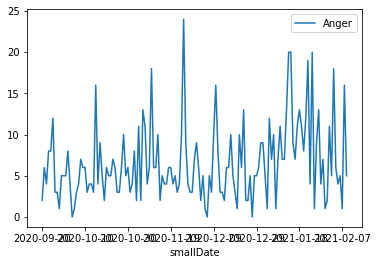

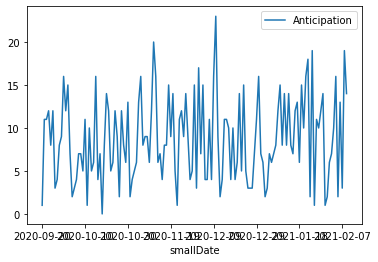

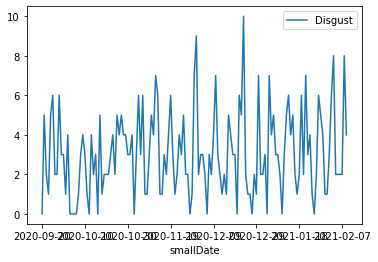

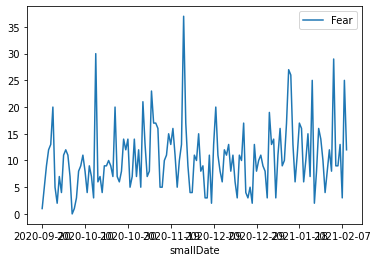

In [21]:
dfnew.plot.line(y=["Anger"])
dfnew.plot.line(y=["Anticipation"])
dfnew.plot.line(y=["Disgust"])
dfnew.plot.line(y=["Fear"])

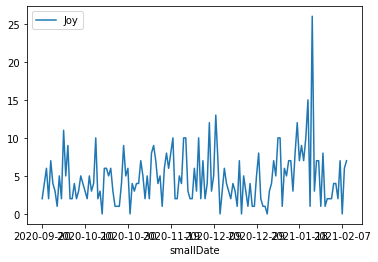

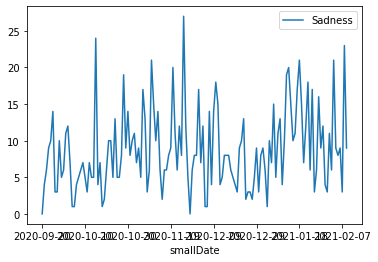

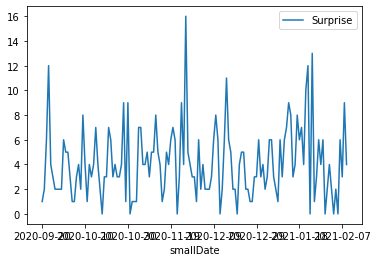

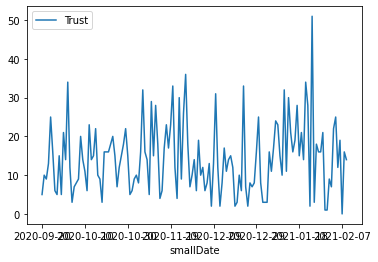

In [22]:
dfnew.plot.line(y=["Joy"])
dfnew.plot.line(y=["Sadness"])
dfnew.plot.line(y=["Surprise"])
dfnew.plot.line(y=["Trust"])

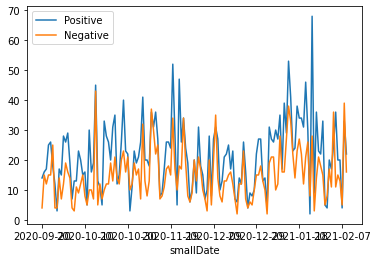

In [23]:
dfnew.plot.line(y=["Positive","Negative"])

In [25]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
y1=df['Positive']
y2=df['Negative']
X=df[['Anger','Anticipation','Disgust','Fear','Joy','Sadness','Surprise','Trust']]

In [27]:
X1=sm.add_constant(X)
model1=sm.OLS(y1,X1)
result=model1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Positive   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     294.7
Date:                Wed, 10 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:28:21   Log-Likelihood:                -4298.2
No. Observations:                3199   AIC:                             8614.
Df Residuals:                    3190   BIC:                             8669.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3657      0.022     16.779   

In [28]:
model2=sm.OLS(y2,X1)
result=model2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Negative   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     834.3
Date:                Wed, 10 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:28:27   Log-Likelihood:                -2594.2
No. Observations:                3199   AIC:                             5206.
Df Residuals:                    3190   BIC:                             5261.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1581      0.013     12.358   